In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
dataset = pd.read_csv('/kaggle/input/remote-work-of-health-impact-survey-june-2025/post_pandemic_remote_work_health_impact_2025.csv')
dataset.head(10)

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range
0,2025-06-01,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High,3,Shoulder Pain; Neck Pain,2,$40K-60K
1,2025-06-01,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,High,4,Back Pain,2,$80K-100K
2,2025-06-01,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,High,3,Shoulder Pain; Eye Strain,2,$80K-100K
3,2025-06-01,40,Female,Europe,Education,Data Analyst,Onsite,63,ADHD,Medium,1,Shoulder Pain; Eye Strain,2,$60K-80K
4,2025-06-01,30,Male,South America,Manufacturing,DevOps Engineer,Hybrid,65,NaN,Medium,5,NaN,4,$60K-80K
5,2025-06-01,52,Male,Oceania,Customer Service,Business Analyst,Onsite,61,Burnout,Medium,4,Back Pain; Shoulder Pain,3,$60K-80K
6,2025-06-01,50,Female,Asia,Manufacturing,IT Support,Onsite,62,NaN,Medium,4,Back Pain; Shoulder Pain; Wrist Pain,2,$80K-100K
7,2025-06-01,63,Non-binary,Europe,Professional Services,Technical Writer,Onsite,55,Anxiety,High,3,NaN,2,$100K-120K
8,2025-06-01,30,Female,South America,Technology,Software Engineer,Remote,47,Anxiety,Medium,2,Neck Pain,4,$60K-80K
9,2025-06-01,37,Female,Asia,Finance,HR Manager,Onsite,55,Burnout,Medium,5,Back Pain,1,$60K-80K


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3157 entries, 0 to 3156
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Survey_Date              3157 non-null   object
 1   Age                      3157 non-null   int64 
 2   Gender                   3157 non-null   object
 3   Region                   3157 non-null   object
 4   Industry                 3157 non-null   object
 5   Job_Role                 3157 non-null   object
 6   Work_Arrangement         3157 non-null   object
 7   Hours_Per_Week           3157 non-null   int64 
 8   Mental_Health_Status     2358 non-null   object
 9   Burnout_Level            3157 non-null   object
 10  Work_Life_Balance_Score  3157 non-null   int64 
 11  Physical_Health_Issues   2877 non-null   object
 12  Social_Isolation_Score   3157 non-null   int64 
 13  Salary_Range             3157 non-null   object
dtypes: int64(4), object(10)
memory usage: 34

In [4]:
dataset.describe(include='all')

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range
count,3157,3157.000000,3157,3157,3157,3157,3157,3157.000000,2358,3157,3157.000000,2877,3157.000000,3157
unique,26,NaN,4,6,9,24,3,NaN,6,3,NaN,31,NaN,5
top,2025-06-07,NaN,Male,South America,Professional Services,Research Scientist,Onsite,NaN,PTSD,Medium,NaN,Shoulder Pain; Eye Strain,NaN,$60K-80K
freq,137,NaN,1535,575,730,151,1562,NaN,423,1366,NaN,262,NaN,1014
mean,NaN,43.732024,NaN,NaN,NaN,NaN,NaN,49.904973,NaN,NaN,2.996516,NaN,2.704783,NaN
std,NaN,12.661095,NaN,NaN,NaN,NaN,NaN,8.897699,NaN,NaN,1.163307,NaN,1.188887,NaN
min,NaN,22.000000,NaN,NaN,NaN,NaN,NaN,35.000000,NaN,NaN,1.000000,NaN,1.000000,NaN
25%,NaN,33.000000,NaN,NaN,NaN,NaN,NaN,42.000000,NaN,NaN,2.000000,NaN,2.000000,NaN
50%,NaN,44.000000,NaN,NaN,NaN,NaN,NaN,50.000000,NaN,NaN,3.000000,NaN,3.000000,NaN
75%,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,57.000000,NaN,NaN,4.000000,NaN,4.000000,NaN


In [5]:
dataset.isnull().sum()

Survey_Date                  0
Age                          0
Gender                       0
Region                       0
Industry                     0
Job_Role                     0
Work_Arrangement             0
Hours_Per_Week               0
Mental_Health_Status       799
Burnout_Level                0
Work_Life_Balance_Score      0
Physical_Health_Issues     280
Social_Isolation_Score       0
Salary_Range                 0
dtype: int64

In [6]:
print("Jumlah Duplikasi : ", dataset.duplicated().sum())

Jumlah Duplikasi :  0


In [7]:
dataset.drop(columns='Survey_Date', inplace=True)
dataset['Mental_Health_Status'] = dataset['Mental_Health_Status'].fillna('Unknown')
dataset['Physical_Health_Issues'] = dataset['Physical_Health_Issues'].fillna('Unknown')

In [8]:
print("Jumlah nilai unik per kolom kategorikal:")
for column in dataset.select_dtypes(include='object').columns:
    print(f"{column}: {dataset[column].nunique()} unique values")

Jumlah nilai unik per kolom kategorikal:
Gender: 4 unique values
Region: 6 unique values
Industry: 9 unique values
Job_Role: 24 unique values
Work_Arrangement: 3 unique values
Mental_Health_Status: 7 unique values
Burnout_Level: 3 unique values
Physical_Health_Issues: 32 unique values
Salary_Range: 5 unique values


In [9]:
print(len(dataset))

3157


In [10]:
categorical_cols = ['Gender', 'Region', 'Industry', 'Job_Role', 'Work_Arrangement', 'Mental_Health_Status',
                    'Burnout_Level', 'Physical_Health_Issues', 'Salary_Range']
numerical_cols = ['Age', 'Hours_Per_Week', 'Work_Life_Balance_Score', 'Social_Isolation_Score']

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


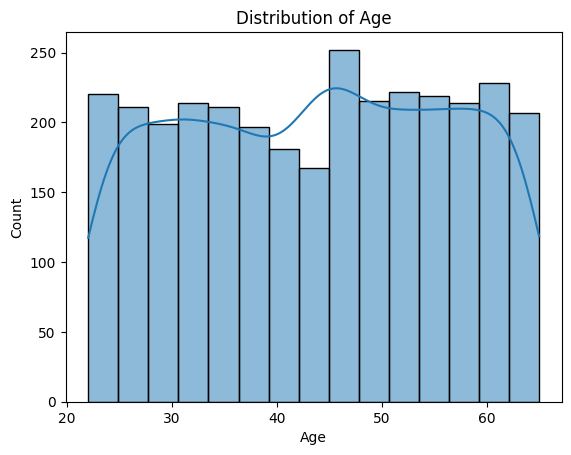

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


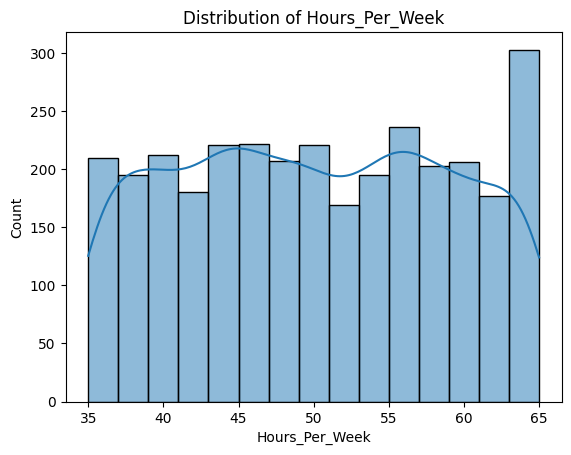

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


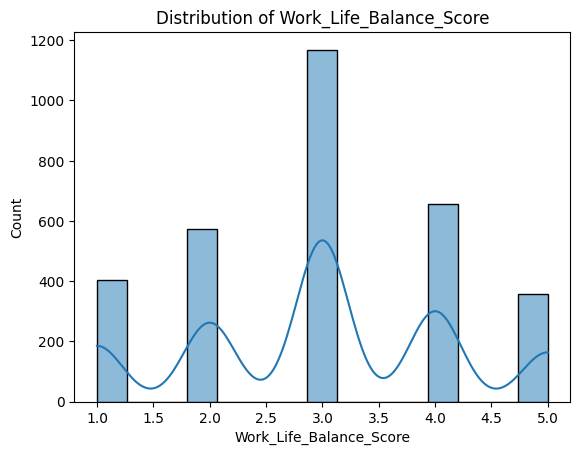

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


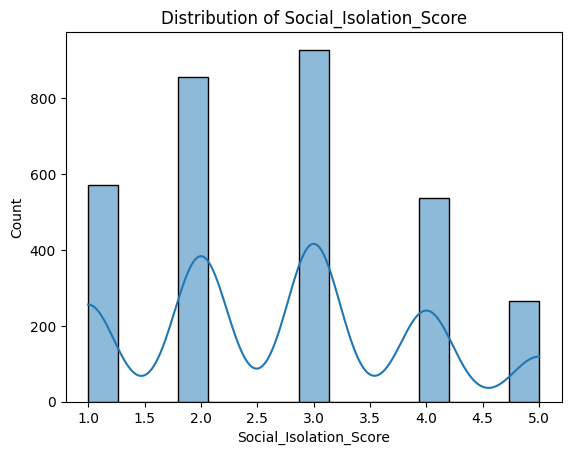

In [11]:
for col in numerical_cols:
    sns.histplot(dataset[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

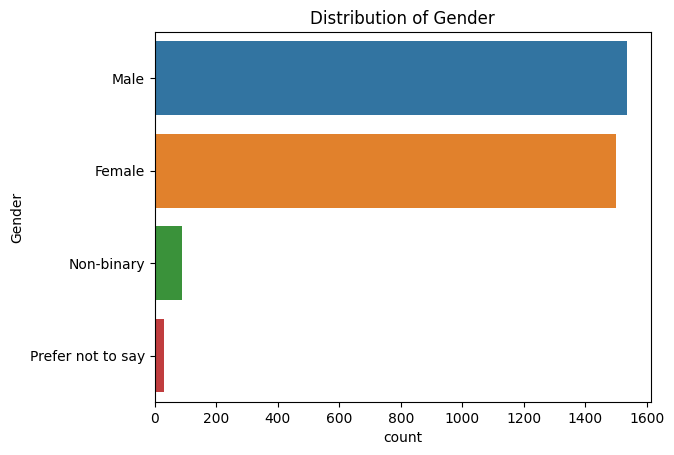

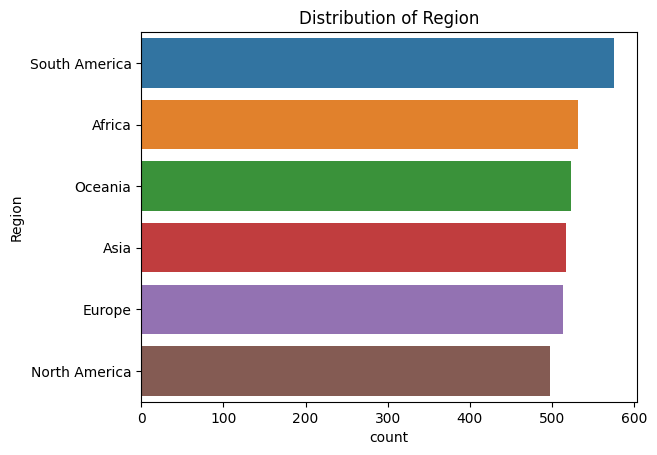

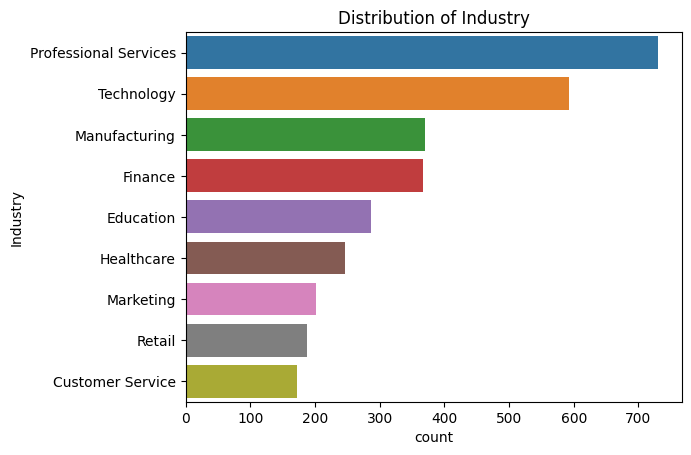

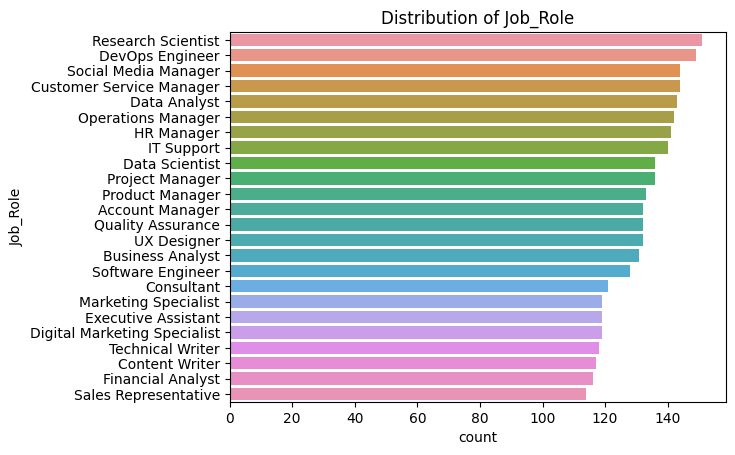

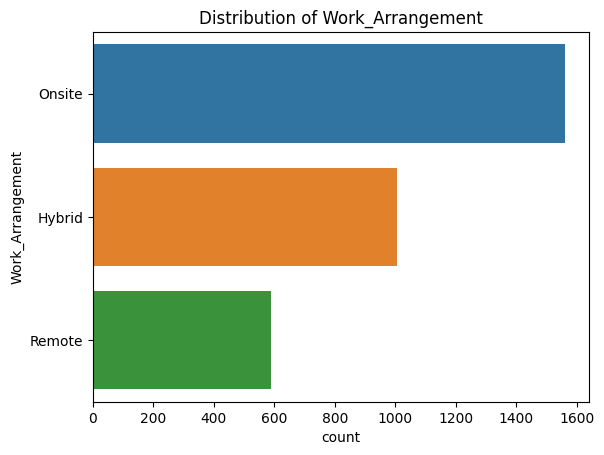

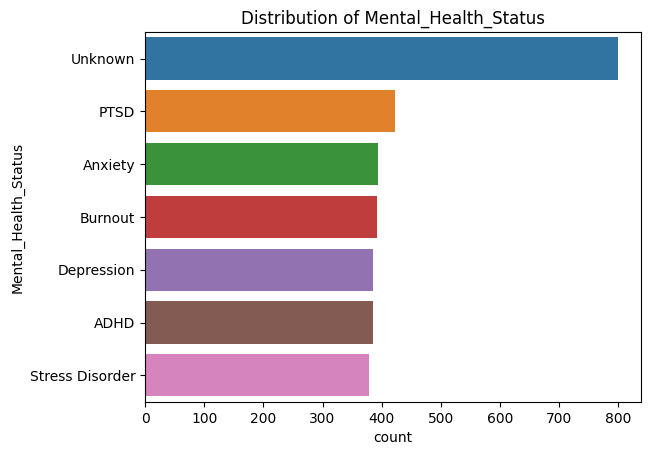

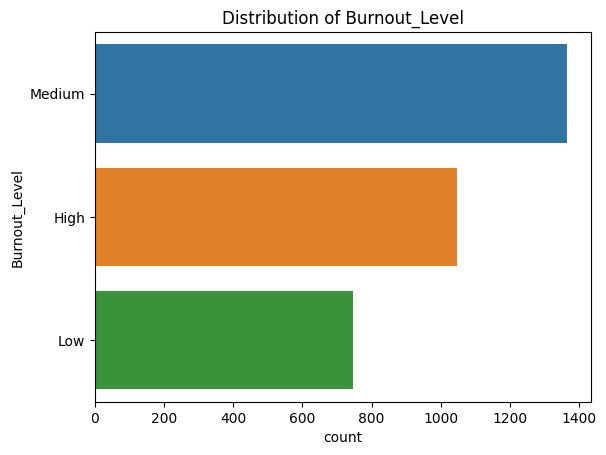

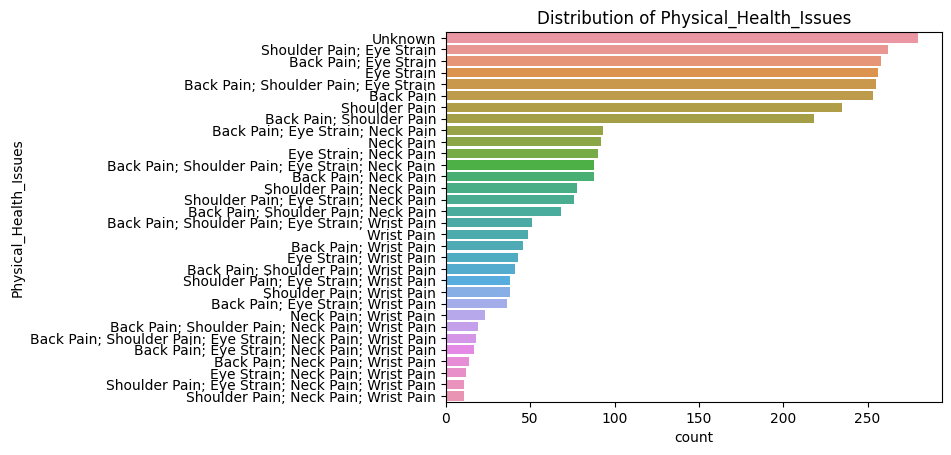

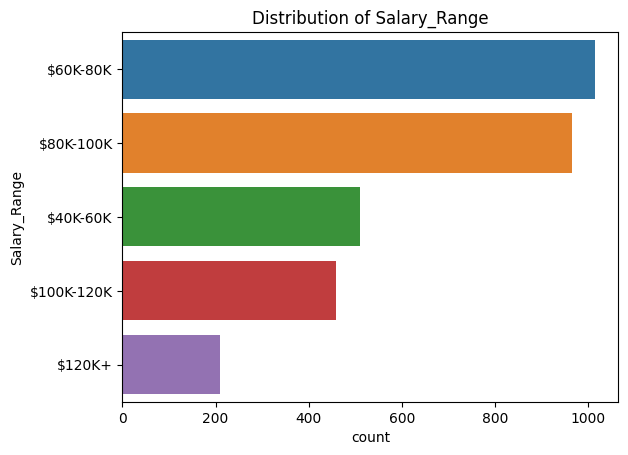

In [12]:
categorical_cols = dataset.select_dtypes(include='object').columns

for col in categorical_cols:
    sns.countplot(y=col, data=dataset, order=dataset[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()

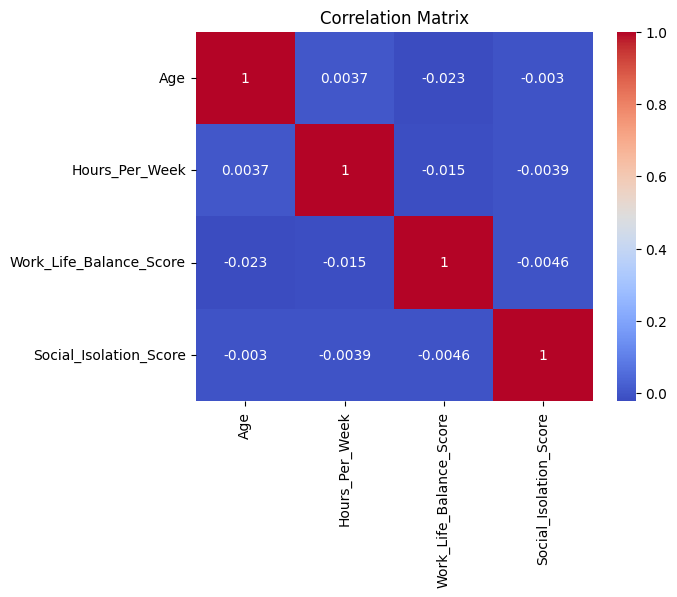

In [13]:
sns.heatmap(dataset[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

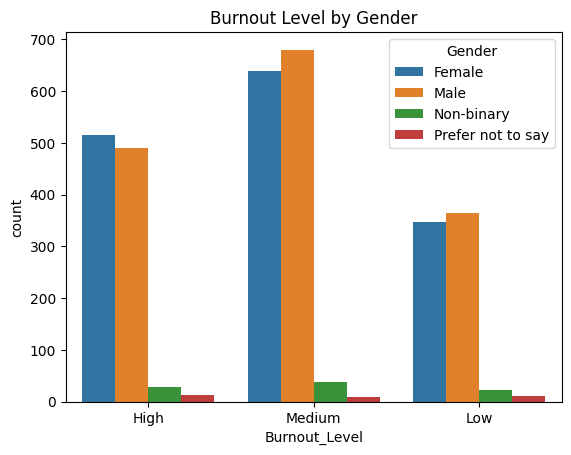

In [14]:
sns.countplot(x='Burnout_Level', hue='Gender', data=dataset)
plt.title("Burnout Level by Gender")
plt.show()

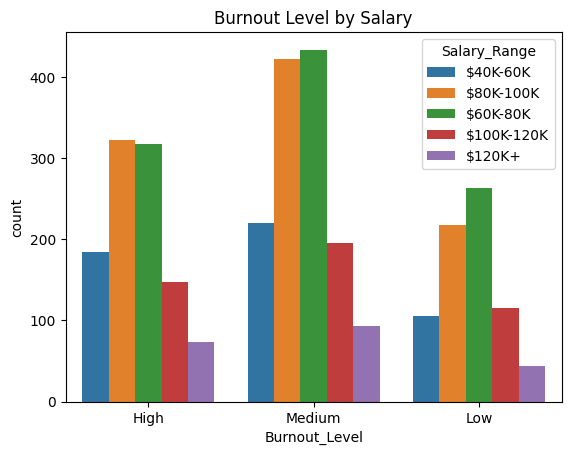

In [15]:
sns.countplot(x='Burnout_Level', hue='Salary_Range', data=dataset)
plt.title("Burnout Level by Salary")
plt.show()

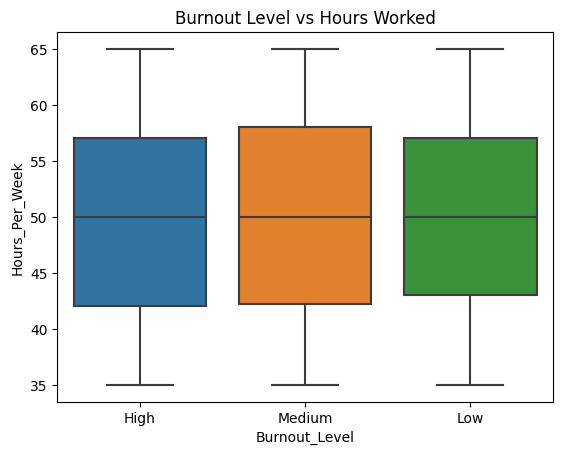

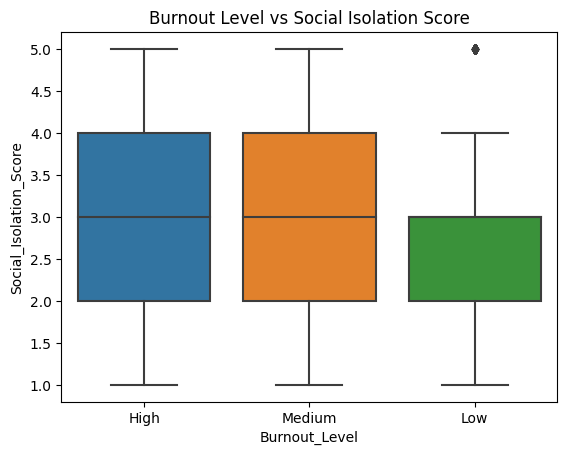

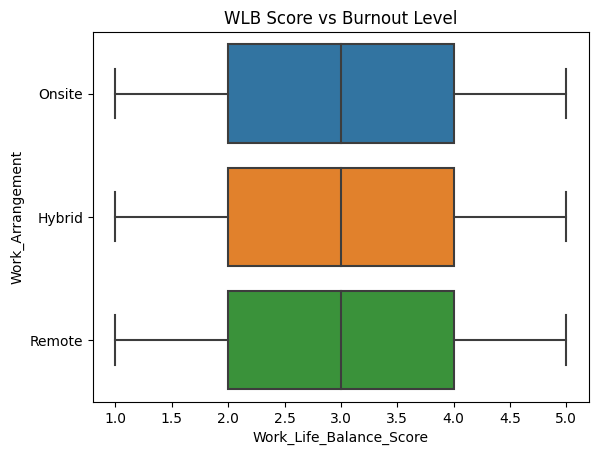

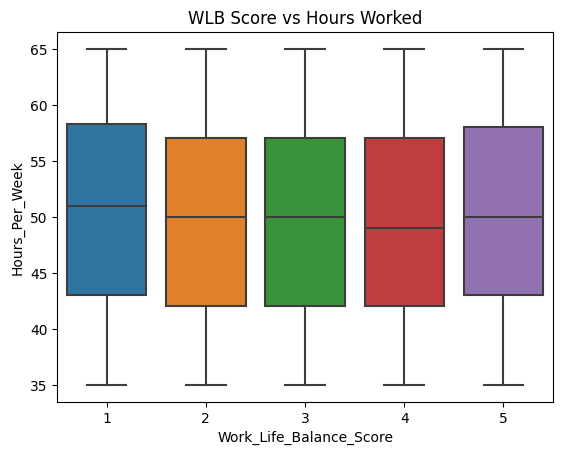

In [16]:
sns.boxplot(x='Burnout_Level', y='Hours_Per_Week', data=dataset)
plt.title('Burnout Level vs Hours Worked')
plt.show()

sns.boxplot(x='Burnout_Level', y='Social_Isolation_Score', data=dataset)
plt.title('Burnout Level vs Social Isolation Score')
plt.show()

sns.boxplot(x='Work_Life_Balance_Score', y='Work_Arrangement', data=dataset)
plt.title('WLB Score vs Burnout Level')
plt.show()

sns.boxplot(x='Work_Life_Balance_Score', y='Hours_Per_Week', data=dataset)
plt.title('WLB Score vs Hours Worked')
plt.show()


## Modelling

In [17]:
encoder = LabelEncoder()
dataset['Burnout_Level'] = encoder.fit_transform(dataset['Burnout_Level'])
# Encoder by ASC Alphabet, so 0: High, 1: Low, 2: Medium

In [18]:
features = ['Gender', 'Region', 'Industry', 'Job_Role', 'Work_Arrangement', 'Mental_Health_Status',
                    'Physical_Health_Issues', 'Salary_Range']

dataset_encoded = dataset.drop(columns='Burnout_Level')
dataset_encoded = pd.get_dummies(dataset_encoded, columns=features, drop_first=True)
dataset_encoded

,Age,Hours_Per_Week,Work_Life_Balance_Score,Social_Isolation_Score,Gender_Male,Gender_Non-binary,Gender_Prefer not to say,Region_Asia,Region_Europe,Region_North America,...,Physical_Health_Issues_Shoulder Pain; Eye Strain; Wrist Pain,Physical_Health_Issues_Shoulder Pain; Neck Pain,Physical_Health_Issues_Shoulder Pain; Neck Pain; Wrist Pain,Physical_Health_Issues_Shoulder Pain; Wrist Pain,Physical_Health_Issues_Unknown,Physical_Health_Issues_Wrist Pain,Salary_Range_$120K+,Salary_Range_$40K-60K,Salary_Range_$60K-80K,Salary_Range_$80K-100K
0,27,64,3,2,False,False,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
1,37,37,4,2,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
2,32,36,3,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,40,63,1,2,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4,30,65,5,4,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3152,62,38,4,3,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
3153,24,54,4,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3154,45,59,1,3,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3155,38,52,3,5,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True


In [19]:
X = dataset_encoded
y = dataset['Burnout_Level']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [21]:
GradientBoosting = GradientBoostingClassifier(random_state=42)
GradientBoosting.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [22]:
y_pred = GradientBoosting.predict(X_test)

class_names = [str(label) for label in encoder.classes_]
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

        High       0.35      0.25      0.29       209
         Low       0.37      0.12      0.18       149
      Medium       0.43      0.69      0.53       274

    accuracy                           0.41       632
   macro avg       0.38      0.35      0.33       632
weighted avg       0.39      0.41      0.37       632



In [23]:
RFClassifier = RandomForestClassifier(random_state=42, class_weight='balanced')
RFClassifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [24]:
y_pred = RFClassifier.predict(X_test)

class_names = [str(label) for label in encoder.classes_]
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

        High       0.32      0.27      0.30       209
         Low       0.22      0.09      0.13       149
      Medium       0.40      0.57      0.47       274

    accuracy                           0.36       632
   macro avg       0.31      0.31      0.30       632
weighted avg       0.33      0.36      0.33       632



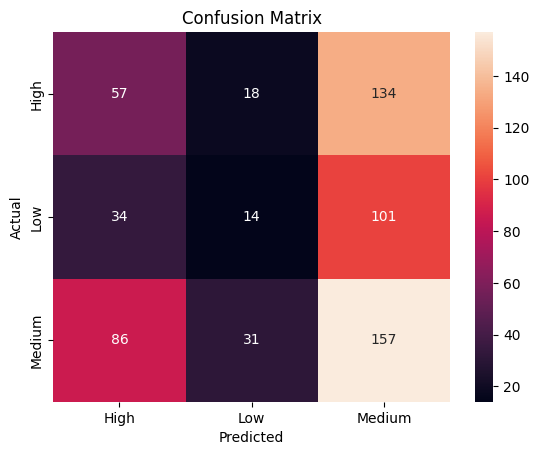

In [25]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Logistic Regression Akurasi Cross-Validation: 0.4092 (+/- 0.0072)

--- Melatih Logistic Regression ---
Akurasi: 0.3877

Classification Report:
              precision    recall  f1-score   support

        High       0.33      0.25      0.28       209
         Low       0.27      0.08      0.12       149
      Medium       0.42      0.66      0.51       274

    accuracy                           0.39       632
   macro avg       0.34      0.33      0.31       632
weighted avg       0.36      0.39      0.35       632


Confusion Matrix:
[[ 52  13 144]
 [ 31  12 106]
 [ 73  20 181]]


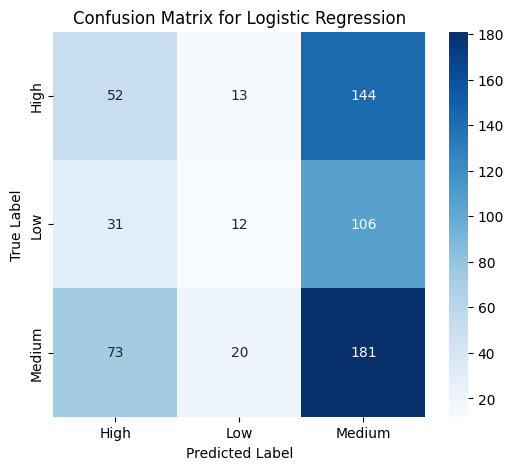

Decision Tree Akurasi Cross-Validation: 0.3716 (+/- 0.0163)

--- Melatih Decision Tree ---
Akurasi: 0.3544

Classification Report:
              precision    recall  f1-score   support

        High       0.33      0.31      0.32       209
         Low       0.26      0.30      0.28       149
      Medium       0.43      0.42      0.42       274

    accuracy                           0.35       632
   macro avg       0.34      0.34      0.34       632
weighted avg       0.36      0.35      0.36       632


Confusion Matrix:
[[ 64  51  94]
 [ 43  44  62]
 [ 85  73 116]]


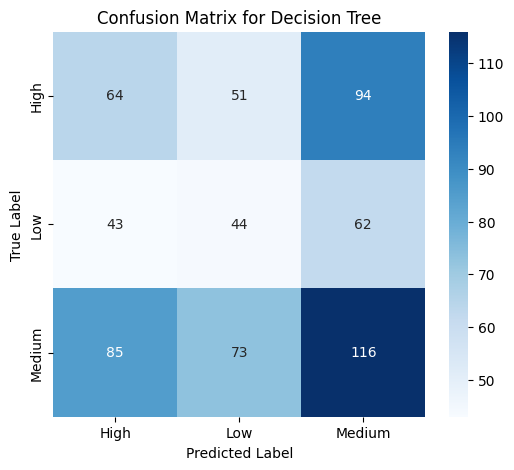

Random Forest Akurasi Cross-Validation: 0.4093 (+/- 0.0077)

--- Melatih Random Forest ---
Akurasi: 0.3782

Classification Report:
              precision    recall  f1-score   support

        High       0.32      0.28      0.30       209
         Low       0.33      0.11      0.16       149
      Medium       0.41      0.60      0.49       274

    accuracy                           0.38       632
   macro avg       0.35      0.33      0.32       632
weighted avg       0.36      0.38      0.35       632


Confusion Matrix:
[[ 58  11 140]
 [ 35  16  98]
 [ 87  22 165]]


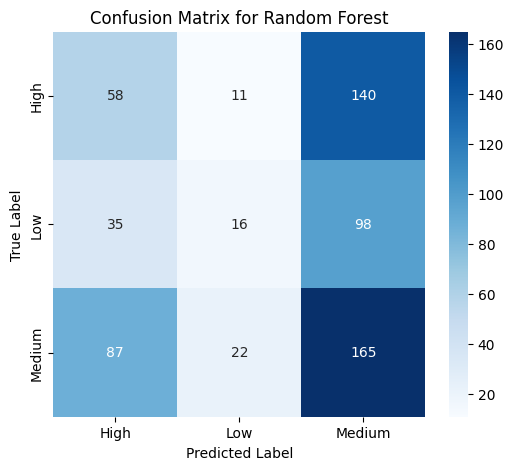

Gradient Boosting Akurasi Cross-Validation: 0.4143 (+/- 0.0131)

--- Melatih Gradient Boosting ---
Akurasi: 0.4082

Classification Report:
              precision    recall  f1-score   support

        High       0.35      0.25      0.29       209
         Low       0.37      0.12      0.18       149
      Medium       0.43      0.69      0.53       274

    accuracy                           0.41       632
   macro avg       0.38      0.35      0.33       632
weighted avg       0.39      0.41      0.37       632


Confusion Matrix:
[[ 52  13 144]
 [ 30  18 101]
 [ 68  18 188]]


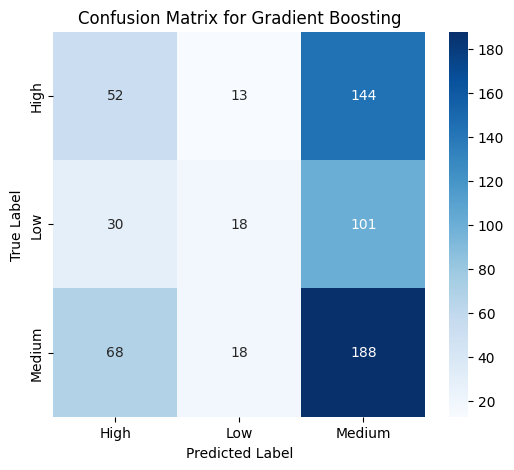

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore') # Untuk mengabaikan warning yang mungkin muncul
from sklearn.model_selection import cross_val_score

models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear'),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy') # cv=5 berarti 5-fold cross-validation
    print(f"{name} Akurasi Cross-Validation: {scores.mean():.4f} (+/- {scores.std():.4f})")
    print(f"\n--- Melatih {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=class_names)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        'accuracy': accuracy,
        'classification_report': report,
        'confusion_matrix': cm
    }

    print(f"Akurasi: {accuracy:.4f}")
    print("\nClassification Report:")
    print(report)
    print("\nConfusion Matrix:")
    print(cm)

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [27]:
df_temp_corr = dataset_encoded.copy()
df_temp_corr['Burnout_Level'] = dataset['Burnout_Level'] # Pastikan kolom ini ada

correlations = df_temp_corr.corr()['Burnout_Level'].sort_values(ascending=False)
print("\nKorelasi Fitur dengan Burnout_Level:")
print(correlations)


Korelasi Fitur dengan Burnout_Level:
Burnout_Level                                                  1.000000
Work_Arrangement_Onsite                                        0.077843
Physical_Health_Issues_Back Pain; Shoulder Pain; Eye Strain    0.044390
Physical_Health_Issues_Shoulder Pain; Neck Pain                0.030775
Job_Role_Quality Assurance                                     0.028473
                                                                 ...   
Physical_Health_Issues_Back Pain; Neck Pain; Wrist Pain       -0.029756
Job_Role_HR Manager                                           -0.042907
Industry_Technology                                           -0.049609
Physical_Health_Issues_Back Pain; Shoulder Pain; Neck Pain    -0.049994
Work_Arrangement_Remote                                       -0.092406
Name: Burnout_Level, Length: 87, dtype: float64
